In [7]:
import matplotlib.pyplot as plt

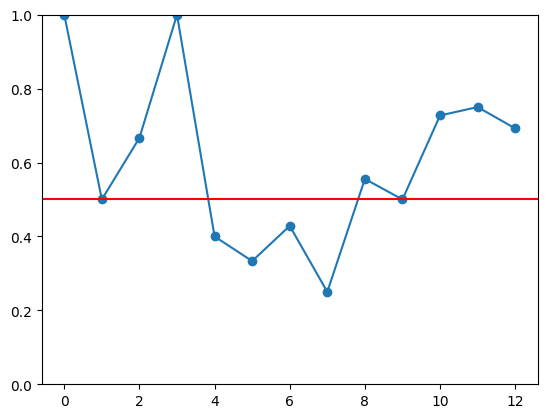

In [10]:
results_list = [1.0, 0.5, 0.6666666666666666, 1.0, 0.4, 0.3333333333333333, 0.42857142857142855, 0.25, 0.5555555555555556, 0.5, 0.7272727272727273, 0.75, 0.6923076923076923]

 # 繪製標準化後的數據，並添加標記以顯示每個點
plt.plot(results_list, marker='o')

    # 繪製 y = 0.5 的線
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylim(0, 1)
    # 顯示圖表
plt.show()

In [4]:
from qiskit import QuantumCircuit, Aer, transpile, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

# Load the saved IBM Q account
IBMQ.load_account()

# Get the provider
provider = IBMQ.get_provider()


results_list = []

# 迴圈 n=1 ~ 
for n in range(1, 1000000001):
    backend = least_busy(provider.backends(simulator = False))
    print(f"Using {backend.name()}")

    # 創建一個量子電路
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # 添加 H-gate
    qc.measure([0], [0])

    # 編譯電路
    compiled_circuit = transpile(qc,  backend=backend, optimization_level=3)


    # 執行模擬
    job =  backend.run(compiled_circuit, shots=n)
    result = job.result()
    counts = result.get_counts(qc)
    
    # 獲取結果為 0 的次數並除以 n
    zero_counts = counts.get('0', 0)
    ratio = zero_counts / n
    results_list.append(ratio)
    
    # 打印結果列=f
    print(results_list)
    print(n)

 #------------------------------------------------------------------
   

    # 繪製標準化後的數據，並添加標記以顯示每個點
    plt.plot(results_list, marker='o')

    # 繪製 y = 0.5 的線
    plt.axhline(y=0.5, color='r', linestyle='-')
    
   # y 軸範圍
    plt.ylim(0, 1)
    # 顯示圖表
    plt.show()

ibmqfactory.load_account:WARNING:2023-11-15 22:42:03,624: Credentials are already in use. The existing account in the session will be replaced.


Using ibm_lagos


IBMQBackendApiError: "Error submitting job: '400 Client Error: Bad Request for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/6554d8c7a45e5817880967e4/jobDataUploaded. Error in runtime client calling method runJob: Error executing POST https://runtime-us-east.quantum-computing.ibm.com/jobs {No request body}, Error code: 2413.'"